In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
%matplotlib inline

In [14]:
df=pd.read_csv("divorce_data.csv",sep=';')

In [17]:
ref=pd.read_csv("reference.tsv",sep='|')

In [18]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q46,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Q1       170 non-null    int64
 1   Q2       170 non-null    int64
 2   Q3       170 non-null    int64
 3   Q4       170 non-null    int64
 4   Q5       170 non-null    int64
 5   Q6       170 non-null    int64
 6   Q7       170 non-null    int64
 7   Q8       170 non-null    int64
 8   Q9       170 non-null    int64
 9   Q10      170 non-null    int64
 10  Q11      170 non-null    int64
 11  Q12      170 non-null    int64
 12  Q13      170 non-null    int64
 13  Q14      170 non-null    int64
 14  Q15      170 non-null    int64
 15  Q16      170 non-null    int64
 16  Q17      170 non-null    int64
 17  Q18      170 non-null    int64
 18  Q19      170 non-null    int64
 19  Q20      170 non-null    int64
 20  Q21      170 non-null    int64
 21  Q22      170 non-null    int64
 22  Q23      170 non-null    i

In [21]:
df.isnull().any().sum()

0

In [24]:
df['Divorce'].value_counts()

0    86
1    84
Name: Divorce, dtype: int64

In [25]:
ref


,atribute_id,description
0,1,If one of us apologizes when our discussion de...
1,2,"I know we can ignore our differences, even if ..."
2,3,"When we need it, we can take our discussions w..."
3,4,"When I discuss with my spouse, to contact him ..."
4,5,The time I spent with my wife is special for us.
5,6,We don't have time at home as partners.
6,7,We are like two strangers who share the same e...
7,8,I enjoy our holidays with my wife.
8,9,I enjoy traveling with my wife.
9,10,Most of our goals are common to my spouse.


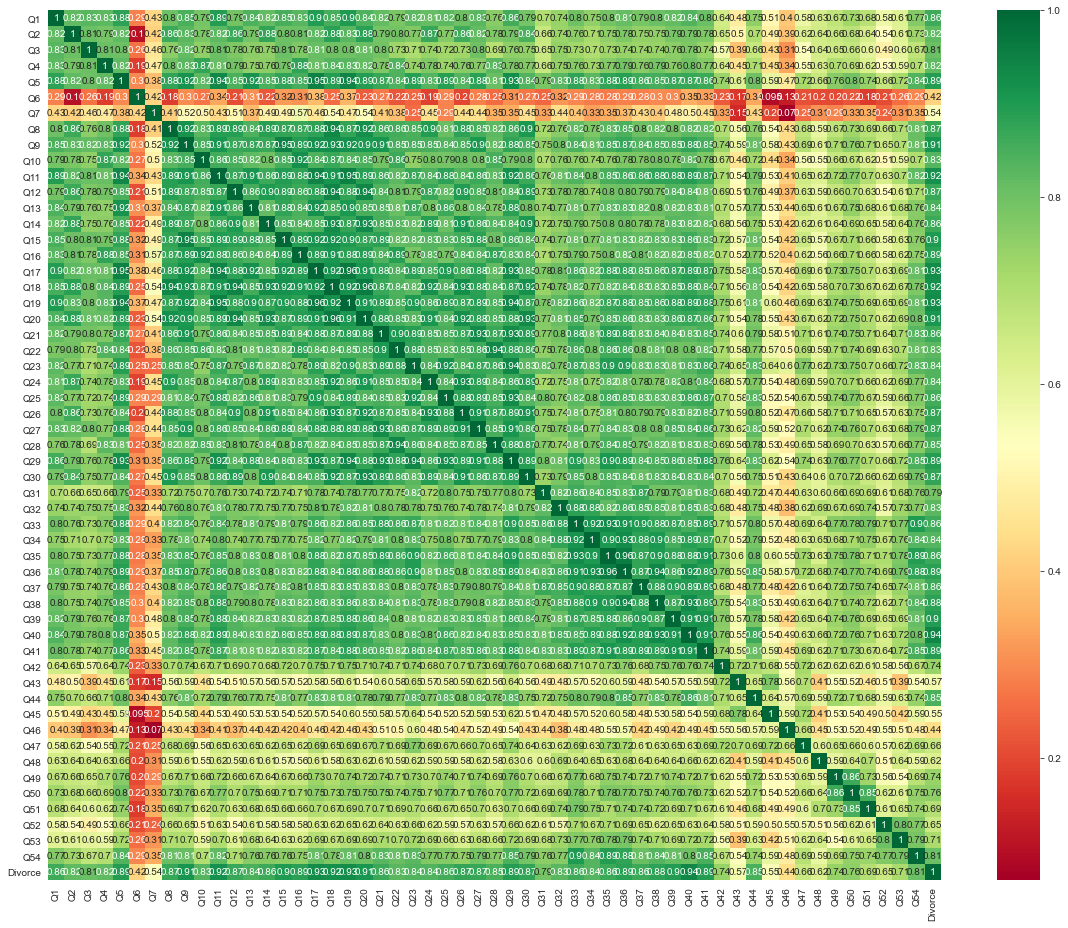

In [34]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(), cmap='RdYlGn', annot=True)
plt.show()

In [30]:
df_matrix = df.corr()



In [31]:
df_matrix["Divorce"].sort_values(ascending=False)


Divorce    1.000000
Q40        0.938684
Q17        0.929346
Q19        0.928627
Q18        0.923208
Q11        0.918386
Q9         0.912368
Q20        0.907008
Q15        0.901220
Q39        0.896180
Q41        0.894356
Q5         0.893180
Q29        0.892954
Q36        0.886497
Q16        0.886260
Q38        0.883311
Q30        0.874531
Q26        0.872868
Q27        0.869788
Q8         0.869569
Q12        0.868983
Q21        0.864519
Q14        0.864316
Q37        0.863597
Q35        0.862624
Q33        0.861328
Q1         0.861324
Q25        0.857052
Q44        0.847336
Q28        0.846606
Q13        0.844743
Q24        0.839392
Q23        0.837504
Q34        0.835167
Q10        0.834897
Q32        0.829056
Q22        0.825938
Q2         0.820774
Q4         0.819583
Q54        0.806765
Q3         0.806709
Q31        0.792607
Q50        0.755248
Q49        0.740704
Q42        0.739629
Q53        0.711176
Q51        0.692681
Q47        0.656409
Q52        0.651478
Q48        0.619830


In [35]:
df_corr=df_matrix["Divorce"].sort_values(ascending=False).head(27)

In [36]:
df_corr

Divorce    1.000000
Q40        0.938684
Q17        0.929346
Q19        0.928627
Q18        0.923208
Q11        0.918386
Q9         0.912368
Q20        0.907008
Q15        0.901220
Q39        0.896180
Q41        0.894356
Q5         0.893180
Q29        0.892954
Q36        0.886497
Q16        0.886260
Q38        0.883311
Q30        0.874531
Q26        0.872868
Q27        0.869788
Q8         0.869569
Q12        0.868983
Q21        0.864519
Q14        0.864316
Q37        0.863597
Q35        0.862624
Q33        0.861328
Q1         0.861324
Name: Divorce, dtype: float64

In [48]:
df.duplicated().sum()

0

In [47]:
df=df.drop_duplicates(keep="first")

In [49]:
df.duplicated().sum()


0

In [51]:
df.shape

(150, 55)

In [53]:
df_info=df
df_info["Description"]=ref["description"]
df_info.head()

ipykernel_launcher:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,Q47,Q48,Q49,Q50,Q51,Q52,Q53,Q54,Divorce,Description
0,2,2,4,1,0,0,0,0,0,0,...,1,3,3,3,2,3,2,1,1,If one of us apologizes when our discussion de...
1,4,4,4,4,4,0,0,4,4,4,...,2,3,4,4,4,4,2,2,1,"I know we can ignore our differences, even if ..."
2,2,2,2,2,1,3,2,1,1,2,...,2,3,1,1,1,2,2,2,1,"When we need it, we can take our discussions w..."
3,3,2,3,2,3,3,3,3,3,3,...,2,3,3,3,3,2,2,2,1,"When I discuss with my spouse, to contact him ..."
4,2,2,1,1,1,1,0,0,0,0,...,1,2,3,2,2,2,1,0,1,The time I spent with my wife is special for us.
